In [13]:
import geopandas as gp

b = gp.read_file('/media/skymap/Learnning/public/Komsat_change_8bit_perimage/change_object_box_Aug_Jan/komsat_change_area_box.shp')
c = gp.read_file('/media/skymap/Learnning/public/Komsat_change_8bit_perimage/change_object_box_Aug_Jan/komsat_change_tree_box.shp')
a = gp.read_file('/media/skymap/Learnning/public/Komsat_change_8bit_perimage/change_object_box_Aug_Jan/komsat_changebuilding_box.shp')

# a['fid']=None
# a = a.rename(columns={'fid': 'id'})
a=a.to_crs('EPSG:32639')
b=b.to_crs('EPSG:32639')
c=c.to_crs('EPSG:32639')

a['label'] = 1
b['label'] = 2
c['label'] = 3
xxx = a.append(b)
xxx = xxx.append(c)

# ddd = gp.read_file('/media/skymap/Learnning/public/data_multi_change/change_tree/boxxx.shp')
# mmm = gp.overlay(ddd, xxx, how='intersection')

# mmm.to_file('/media/skymap/Learnning/public/data_multi_change/change_tree/multi_all_label.shp')
# xxx.to_file('/media/skymap/Learnning/public/Komsat_change_8bit_perimage/change_object_box_Aug_Jan/komsat_box.shp')

In [1]:
from tensorflow import math
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

def gelu_(X):
    return 0.5*X*(1.0 + math.tanh(0.7978845608028654*(X + 0.044715*math.pow(X, 3))))
class GELU(Layer):
    def __init__(self, trainable=False, **kwargs):
        super(GELU, self).__init__(**kwargs)
        self.supports_masking = True
        self.trainable = trainable

    def build(self, input_shape):
        super(GELU, self).build(input_shape)

    def call(self, inputs, mask=None):
        return gelu_(inputs)

    def get_config(self):
        config = {'trainable': self.trainable}
        base_config = super(GELU, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))
    def compute_output_shape(self, input_shape):
        return input_shape

2022-01-04 08:52:19.258541: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Dropout, Input
from tensorflow.keras import  Model

def model_unet_zhixuhao(num_channel,size, num_class=1):
    inputs = Input((size, size,int(num_channel)))
    conv1 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = GELU()(conv1)
    conv1 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = GELU()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = GELU()(conv2)
    conv2 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv2 = GELU()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = GELU()(conv3)
    conv3 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3 = GELU()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = GELU()(conv4)
    conv4 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv4 = GELU()(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = GELU()(conv5)
    conv5 = Conv2D(1024, 3, padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5 = GELU()(conv5)
    drop5 = Dropout(0.5)(conv5)
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(drop5)
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = GELU()(conv6)
    conv6 = Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = GELU()(conv6)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = GELU()(conv7)
    conv7 = Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7 = GELU()(conv7)

    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = GELU()(conv8)
    conv8 = Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = GELU()(conv8)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = GELU()(conv9)
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = GELU()(conv9)
    conv9 = Conv2D(2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = GELU()(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)
    # optimizer=Adam(lr=1e-5)
    # model.compile(optimizer = optimizer, loss = bce_dice_loss, metrics = ['accuracy',jaccard_coef, jaccard_coef_int])
    
    return model

In [32]:
def run_add_colormap(img_need_add_color_map):
    with rasterio.Env():
        with rasterio.open(img_need_add_color_map) as src:
            shade = src.read(1)
            meta = src.meta.copy()
            meta.update({'nodata': 0})
        with rasterio.open(img_need_add_color_map, 'w', compress='lzw', **meta) as dst:
            dst.write(shade, indexes=1)
            dst.write_colormap(
                1, {
                    0: (0, 0, 0, 0),
                    1: (100, 149, 237, 255), 
                    2: (34,139,34,255),
                    3: (101,67,33, 255)})
run_add_colormap("/media/skymap/Learnning/public/DA/1_TreeCounting_All_DATA/Data_origin/create_data_train_one_type/img/Nam_predict/merge_mask_3class.tif")

/home/skymap/anaconda3/envs/mlenv/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: This format doesn't support alpha in colormap entries. The value will be ignored.
  


In [1]:
%cd cythonn
!python setup.py build_ext --inplace
%cd ../

/mnt/data/Nam_work_space/cythonn
Compiling Vectorization.pyx because it changed.
[1/1] Cythonizing Vectorization.pyx
/home/skymap/anaconda3/envs/tf25/lib/python3.8/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /mnt/data/Nam_work_space/cythonn/Vectorization.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'Vectorization' extension
gcc -pthread -B /home/skymap/anaconda3/envs/tf25/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/skymap/anaconda3/envs/tf25/include/python3.8 -c Vectorization.c -o build/temp.linux-x86_64-3.8/Vectorization.o
gcc -pthread -shared -B /home/skymap/anaconda3/envs/tf25/compiler_compat -L/home/skymap/anaconda3/envs/tf25/lib -Wl,-rpath=/home/skymap/anaconda3/envs/tf25/lib -Wl,--no-as-needed -Wl,--sysroot=/ build/temp.linux-x86_64-3.8/Vectorization.o -o 

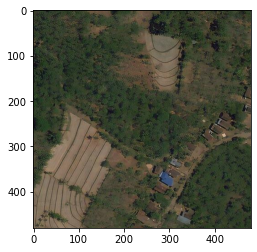

In [7]:
import matplotlib.pyplot as plt
import numpy as np

a = np.load('/mnt/Nam/tmp_Nam/Nam_work_space/data_train/image_40/box_017.npy')
plt.imshow(a)

In [6]:
import rasterio
import cv2
import numpy as np
from skimage.morphology import skeletonize, remove_small_holes, remove_small_objects
import time
import os, glob

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

path_img = '/mnt/Nam/public/farm_maxar/data/predict_v2/*.tif'
# for img_path in os.listdir(path_img):
for img_path in glob.glob(path_img):
    print(img_path)
    out_img = '/mnt/Nam/public/farm_maxar/data/predict_v2/skeleton/'+os.path.basename(img_path)
    if not os.path.exists(out_img):
        with rasterio.open(img_path) as f:
            data = f.read()[0]
            out_meta = f.meta
        img = cv2.morphologyEx(data, cv2.MORPH_OPEN, kernel)
        for i in range(3):
            img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
        img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel2)
        for _ in range(3):
            img = cv2.morphologyEx(data, cv2.MORPH_CLOSE, kernel)
        img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel2)
        
        data = remove_small_holes(img.astype(bool), area_threshold=200)
        data = remove_small_objects(data, min_size=200)
        # skeleton = skeletonize(np.logical_not(data).astype(np.uint8))
        skeleton = skeletonize(data.astype(np.uint8))
        with rasterio.open(out_img, "w", **out_meta, compress='lzw') as dest:
            dest.write(skeleton[np.newaxis,...])

/mnt/Nam/public/farm_maxar/data/predict_v2/10500100191CD200-visual.tif
/mnt/Nam/public/farm_maxar/data/predict_v2/1030010084311900-visual.tif
/mnt/Nam/public/farm_maxar/data/predict_v2/10300100AD9AA500-visual.tif
/mnt/Nam/public/farm_maxar/data/predict_v2/10300100BB7A5700-visual.tif
/mnt/Nam/public/farm_maxar/data/predict_v2/10300100A86F9700-visual.tif
/mnt/Nam/public/farm_maxar/data/predict_v2/1040010047456300-visual.tif
/mnt/Nam/public/farm_maxar/data/predict_v2/10300100B51C4600-visual.tif


In [3]:
import rasterio
import cv2
import numpy as np
from cythonn import helloworld, Vectorization
import time
import os, glob
import rasterio
import cv2
import numpy as np
from skimage.morphology import skeletonize, remove_small_holes, remove_small_objects
from math import sqrt
import time
import os, glob


# path_img = '/mnt/Nam/farm_pleiades/predictxxx.tif'
# # for img_path in os.listdir(path_img):
# for img_path in glob.glob(path_img):
#     print(img_path)
#     out_img = '/mnt/Nam/farm_pleiades/result_pleiades_8u.tif'
#     # if not os.path.exists(out_img):
#     #     print(out_img)
#     with rasterio.open(img_path) as f:
#         data = f.read()
#         out_meta = f.meta
#     star = time.time()
#     data = remove_small_holes(data.astype(bool), area_threshold=77)
#     data = remove_small_objects(data, min_size=77)
#     # skeleton = skeletonize(np.logical_not(data).astype(np.uint8))
#     skeleton = skeletonize(data.astype(np.uint8))
#     with rasterio.open(out_img, "w", **out_meta, compress='lzw') as dest:
#         dest.write(skeleton)


# image = '/mnt/Nam/farm_pleiades/result_pleiades_8u.tif'
with rasterio.open(out_img) as inds:
    img = inds.read()[0]
    transform = inds.transform
    projstr = inds.crs.to_string()
end = time.time()
save_path = '/mnt/Nam/Public_backup/farm_data/3Band_zoom18/ds8/grid1_mask_skeleton.geojson'
# if not os.path.exists(save_path):
try:
    print(save_path)
    test = Vectorization.save_polygon(np.pad(img, pad_width=1).astype(np.intc), 3,5,transform, projstr, save_path)
    print(time.time()-end)
except:
    print(100*'-')
    print(save_path)
    print(100*'-')

/mnt/Nam/Public_backup/farm_data/3Band_zoom18/ds8/grid1_mask_skeleton.geojson
5.106367588043213


In [1]:
import rasterio
import cv2
import numpy as np
from cythonn import helloworld, Vectorization
import time
import os, glob
import rasterio
import cv2
import numpy as np
from skimage.morphology import skeletonize, remove_small_holes, remove_small_objects
from math import sqrt
import time
import os, glob


path_img =  "/mnt/Nam/Public_backup/farm_data/3Band_zoom18/ds8/grid1_mask.tif"
# for img_path in os.listdir(path_img):
for img_path in glob.glob(path_img):
    print(img_path)
    out_img =  "/mnt/Nam/Public_backup/farm_data/3Band_zoom18/ds8/grid1_mask_skeleton.tif"
    # if not os.path.exists(out_img):
    #     print(out_img)
    with rasterio.open(img_path) as f:
        data = f.read()
        out_meta = f.meta
    star = time.time()
    data = remove_small_holes(data.astype(bool), area_threshold=77)
    data = remove_small_objects(data, min_size=77)
    # skeleton = skeletonize(np.logical_not(data).astype(np.uint8))
    skeleton = skeletonize(data.astype(np.uint8))
    with rasterio.open(out_img, "w", **out_meta, compress='lzw') as dest:
        dest.write(skeleton)


/mnt/Nam/Public_backup/farm_data/3Band_zoom18/ds8/grid1_mask.tif


In [10]:
import rasterio
import cv2
import numpy as np
from cythonn import helloworld, Vectorization
import time
import os, glob

path_img = "/mnt/Nam/public/farm_maxar/data/predict_v2/skeleton/"
for img_path in os.listdir(path_img):
    image = path_img+img_path
    with rasterio.open(image) as inds:
        img = inds.read()[0]
        transform = inds.transform
        projstr = inds.crs.to_string()
    end = time.time()
    save_path = "/mnt/Nam/public/farm_maxar/result_v3/" + img_path.replace('.tif', '.geojson')
    # if not os.path.exists(save_path):
    try:
        print(save_path)
        test = Vectorization.save_polygon(np.pad(img, pad_width=1).astype(np.intc), 5,15,transform, projstr, save_path)
        print(time.time()-end)
    except:
        print(100*'-')
        print(save_path)
        print(100*'-')

/mnt/Nam/public/farm_maxar/result_v3/10500100191CD200-visual.geojson
3.131751537322998
/mnt/Nam/public/farm_maxar/result_v3/1030010084311900-visual.geojson
3.877816915512085
/mnt/Nam/public/farm_maxar/result_v3/10300100AD9AA500-visual.geojson
3.029956102371216
/mnt/Nam/public/farm_maxar/result_v3/10300100BB7A5700-visual.geojson
5.559977054595947
/mnt/Nam/public/farm_maxar/result_v3/10300100A86F9700-visual.geojson
7.739389419555664
/mnt/Nam/public/farm_maxar/result_v3/1040010047456300-visual.geojson
7.775591135025024
/mnt/Nam/public/farm_maxar/result_v3/10300100B51C4600-visual.geojson
4.909164190292358


In [1]:
import rasterio
import cv2
import numpy as np
import timeit
from skimage.morphology import skeletonize, remove_small_holes, remove_small_objects
from math import sqrt
import time
import os, glob


path_img = '/mnt/data/public/farm-bing18/BingMaps_Kediri_predict/30_12/model_farm/mask/'
for img_path in os.listdir(path_img):
    out_img = '/mnt/data/public/farm-bing18/BingMaps_Kediri_predict/30_12/model_farm/skeleton/'+img_path
    if not os.path.exists(out_img):
        image = path_img + img_path
        print(image)
        with rasterio.open(image) as f:
            data = f.read()
            out_meta = f.meta
        star = time.time()
        data = remove_small_holes(data.astype(bool), area_threshold=77)
        data = remove_small_objects(data, min_size=77)
        print(time.time()-star)
        start = time.time()
        # skeleton = skeletonize(np.logical_not(data).astype(np.uint8))
        skeleton = skeletonize(data.astype(np.uint8))
        print(time.time()-start)
        print(out_img)
        with rasterio.open(out_img, "w", **out_meta, compress='lzw') as dest:
            dest.write(skeleton)

/mnt/data/public/farm-bing18/BingMaps_Kediri_predict/30_12/model_farm/mask/tile_z11_1661_978.tif
25.960707664489746
202.98900699615479
/mnt/data/public/farm-bing18/BingMaps_Kediri_predict/30_12/model_farm/skeleton/tile_z11_1661_978.tif
/mnt/data/public/farm-bing18/BingMaps_Kediri_predict/30_12/model_farm/mask/tile_z11_1661_979.tif
22.578309297561646
201.45164513587952
/mnt/data/public/farm-bing18/BingMaps_Kediri_predict/30_12/model_farm/skeleton/tile_z11_1661_979.tif
/mnt/data/public/farm-bing18/BingMaps_Kediri_predict/30_12/model_farm/mask/tile_z11_1661_980.tif
22.381670475006104
215.54558300971985
/mnt/data/public/farm-bing18/BingMaps_Kediri_predict/30_12/model_farm/skeleton/tile_z11_1661_980.tif
/mnt/data/public/farm-bing18/BingMaps_Kediri_predict/30_12/model_farm/mask/tile_z11_1662_978.tif
22.664931535720825
190.57502722740173
/mnt/data/public/farm-bing18/BingMaps_Kediri_predict/30_12/model_farm/skeleton/tile_z11_1662_978.tif
/mnt/data/public/farm-bing18/BingMaps_Kediri_predict/30_

In [1]:
import time, cv2
import rasterio.mask
import numpy as np
import pandas as pd
import glob, os
import rasterio
import geopandas as gp
from cythonn import helloworld, Vectorization
from skimage.morphology import skeletonize, remove_small_holes, remove_small_objects

path_ggmap = '/mnt/data/public/farm_uint16/mos_neighbor_8u_predict.geojson'
path_bing = '/mnt/data/public/farm_uint16/mos_neighbor_8u_predict_v2.geojson'
img = '/mnt/data/public/farm_uint16/mos_neighbor_8u.tif'
save_path = '/mnt/data/public/farm_uint16/mos_neighbor_8u_result.geojson'

b = gp.read_file(path_ggmap)
a = gp.read_file(path_bing)

a['ida'] = list(range(len(a)))
b['idb'] = list(range(len(b)))

In [2]:
b_c = gp.overlay(b, a, how='difference')
df = a.append(b_c)
gdf = gp.GeoDataFrame(df['geometry'], geometry='geometry', crs='EPSG:4326')

In [8]:
# b = b.to_crs("EPSG:4326")

# df1 = b.iloc[b_c['idb']]
df2 = b.iloc[b['idb'].drop(b_c['idb'])]
df = a.append(df2)
gdf = gp.GeoDataFrame(df['geometry'], geometry='geometry', crs='EPSG:4326')
# df_difference = gp.overlay(a, gdf, how='difference')

# x = gdf.append(df_difference)
# gdf = gp.GeoDataFrame(x['geometry'], geometry='geometry', crs='EPSG:4326')
print(time.time()-end)

17245.86977314949


In [3]:
with rasterio.open(img) as src:
    height = src.height
    width = src.width
    transform = src.transform
    out_meta = src.meta
    projstr = src.crs.to_string()

mask = rasterio.features.geometry_mask(gdf['geometry'].boundary, (height, width), transform, invert=True, all_touched=True).astype('uint8')

end = time.time()
kernel = np.ones((3,3),np.uint8)
img = cv2.dilate(mask,kernel,iterations = 1)
img = remove_small_holes(img.astype(bool), area_threshold=66)
img = skeletonize(img)
print(time.time()-end)
print(mask.shape)
end = time.time()
Vectorization.save_polygon(np.pad(img, pad_width=1).astype(np.intc), 3,5,transform, projstr, save_path)
print(time.time()-end)

6.366254091262817
(11132, 6633)
3.377389430999756


In [10]:
# import rasterio
# import cv2
# import numpy as np
# import timeit
# from skimage.morphology import skeletonize, remove_small_holes,thin
# from math import sqrt
# import sys
# import time
# import copy
# import pandas as pd
# import os, glob


# image_path = '/media/skymap/Learnning/public/farm-bing18/Data/predicttttttttttttttt/label/*.tif'

# for image in glob.glob(image_path):
#     print(image)
#     with rasterio.open(image) as inds:
#         data = inds.read()
#         out_meta = inds.meta
#         transform = inds.transform
#         projstr = inds.crs.to_string()

#         end = time.time()
#         kernel = np.ones((3,3),np.uint8)

#         img = cv2.dilate(data[0],kernel,iterations = 1)
#         img = remove_small_holes(img.astype(bool), area_threshold=66)
#         skeleton = skeletonize(img)
#         print(time.time()-end)
#     #     skeleton = skeletonize(np.logical_not(data).astype(np.uint8))

#     out_img_img = '/media/skymap/Learnning/public/farm-bing18/Data/predicttttttttttttttt/skeee/' + os.path.basename(image)
#     with rasterio.open(out_img_img, "w", **out_meta, compress='lzw') as dest:
#         dest.write(skeleton[np.newaxis,...].astype(np.uint8))

/media/skymap/Learnning/public/farm-bing18/Data/predicttttttttttttttt/label/box_57.tif
32.651195764541626
/media/skymap/Learnning/public/farm-bing18/Data/predicttttttttttttttt/label/box_46.tif
84.7033097743988
/media/skymap/Learnning/public/farm-bing18/Data/predicttttttttttttttt/label/box_49.tif
100.64625883102417
/media/skymap/Learnning/public/farm-bing18/Data/predicttttttttttttttt/label/box_50.tif
84.36880016326904
/media/skymap/Learnning/public/farm-bing18/Data/predicttttttttttttttt/label/box_45.tif
129.77138757705688


In [2]:
import rasterio
import cv2
import numpy as np
import timeit
from skimage.morphology import skeletonize, remove_small_holes
from math import sqrt
import sys
import time
import copy
import pandas as pd
import os, glob
from cythonn import helloworld
import matplotlib.pyplot as plt

image = '/media/skymap/Learnning/public/farm-bing18/sandip_farm/bing_mask_ada.tif'
image1 = '/media/skymap/Learnning/public/farm-bing18/sandip_farm/bing_mask_ada1.tif'
# image2 = '/media/skymap/Learnning/public/farm-bing18/Clip_2_gmap_mask2.tif'

with rasterio.open(image) as f:
    data = f.read()
    
with rasterio.open(image1) as f:
    data1 = f.read()
    
# with rasterio.open(image2) as f:
#     data2 = f.read()
    out_meta = f.meta
    transform = f.transform
    projstr = f.crs.to_string()
    
dataaaa = data+data1
dataaaa[dataaaa!=0]=1


Bad key "text.kerning_factor" on line 4 in
/home/skymap/anaconda3/envs/mlenv/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
star = time.time()
kernel = np.ones((3,3),np.uint8)
data= cv2.dilate(dataaaa[0],kernel,iterations = 1)
data = remove_small_holes(dataaaa.astype(bool), area_threshold=66)
data = remove_small_holes(np.logical_not(data), area_threshold=66)
print(time.time()-star)
start = time.time()
skeleton = skeletonize(np.logical_not(data).astype(np.uint8))

save_path = '/media/skymap/Learnning/public/farm-bing18/sandip_farm/skeleton.geojson'
helloworld.save_polygon(np.pad(skeleton[0], pad_width=1).astype(np.intc), 4,4,transform, projstr, save_path)

0.1515798568725586
done!!!


In [2]:
import rasterio
import cv2
import numpy as np
import timeit
from shapely.geometry import Polygon, box, mapping, LineString
from skimage.morphology import skeletonize, remove_small_holes,thin
from math import sqrt
from shapely.ops import linemerge, unary_union, polygonize, polygonize_full
import sys
import time
import copy 
from cythonn import helloworld, nam
import time
from sklearn.cluster import DBSCAN
import pandas as pd
import os, glob


image = '/media/skymap/Learnning/public/Sinarmas/pb_mounding/s17_new_train/toppp.tif'
with rasterio.open(image) as inds:
    data = inds.read()
    out_meta = inds.meta
    transform = inds.transform
    projstr = inds.crs.to_string()
    check_epsg = inds.crs.is_epsg_code
    if check_epsg:
        epsg_code = inds.crs.to_epsg()
    else:
        epsg_code = None
    if epsg_code:
        out_crs = {'init':'epsg:{}'.format(epsg_code)}
    else:
        out_crs = projstr
    end = time.time()
    data = remove_small_holes(data.astype(bool), area_threshold=15000)
    data = remove_small_holes(np.logical_not(data), area_threshold=15000)
    
    kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 9))
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
    kernel = np.ones((5,5),np.uint8)
    
#     img = cv2.erode(data[0],kernel,iterations = 1)
    img = cv2.morphologyEx(np.logical_not(data).astype(np.uint8)[0], cv2.MORPH_OPEN, kernel3)
    for _ in range(3):
        img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel3)
        img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel2)

#     img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    for _ in range(3):
        img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel3)
        img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel2)
  
    print(time.time()-end)
#     skeleton = skeletonize(np.logical_not(data).astype(np.uint8))
#     skeleton = skeletonize(img)
out_img_img = '/media/skymap/Learnning/public/Sinarmas/pb_mounding/s17_new_train/predict_nam.tif'
with rasterio.open(out_img_img, "w", **out_meta, compress='lzw') as dest:
    dest.write(img[np.newaxis,...].astype(np.uint8))

34.36100220680237


NameError: name 'skeleton' is not defined

In [37]:
image = '/media/skymap/Learnning/public/Sinarmas/pb_mounding/s17_new_train/predict1.tif'
with rasterio.open(image) as inds:
    data = inds.read()
    out_meta = inds.meta
    transform = inds.transform

tophat = cv2.morphologyEx(data[0], cv2.MORPH_TOPHAT, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(189,44)))
out_img_img = '/media/skymap/Learnning/public/Sinarmas/pb_mounding/s17_new_train/toppp.tif'
with rasterio.open(out_img_img, "w", **out_meta, compress='lzw') as dest:
    dest.write(tophat[np.newaxis,...])
    
image = '/media/skymap/Learnning/public/Sinarmas/pb_mounding/s17_new_train/predict.tif'
with rasterio.open(image) as inds:
    data = inds.read()[0]
    out_meta = inds.meta   
    end = time.time()
#     skeleton = thin(data)
    skeleton = skeletonize(np.logical_not(data.astype(bool)), method='lee')
    print(time.time()-end)
out_img_img = '/media/skymap/Learnning/public/Sinarmas/pb_mounding/s17_new_train/skeleton3.tif'
with rasterio.open(out_img_img, "w", **out_meta, compress='lzw') as dest:
    dest.write(skeleton[np.newaxis,...])

In [1]:
%cd cythonn
!python setup.py build_ext --inplace
%cd ../

/mnt/data/Nam_work_space/cythonn
Compiling helloworld.pyx because it changed.
[1/1] Cythonizing helloworld.pyx
/home/skymap/anaconda3/envs/tf25/lib/python3.8/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /mnt/data/Nam_work_space/cythonn/helloworld.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'helloworld' extension
gcc -pthread -B /home/skymap/anaconda3/envs/tf25/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/skymap/anaconda3/envs/tf25/include/python3.8 -c helloworld.c -o build/temp.linux-x86_64-3.8/helloworld.o
gcc -pthread -shared -B /home/skymap/anaconda3/envs/tf25/compiler_compat -L/home/skymap/anaconda3/envs/tf25/lib -Wl,-rpath=/home/skymap/anaconda3/envs/tf25/lib -Wl,--no-as-needed -Wl,--sysroot=/ build/temp.linux-x86_64-3.8/helloworld.o -o /mnt/data/Nam_work_sp

In [1]:
import rasterio
import numpy as np

with rasterio.open('/mnt/data/banana/oscar_banana/test_mask.tif') as r:
    data1 = r.read()
    meta = r.meta
with rasterio.open('/mnt/data/banana/oscar_banana/test.tif') as x:
    data2 = x.read()

In [6]:
data = data1 & data2

In [9]:
with rasterio.open('/mnt/data/banana/oscar_banana/result.tif', 'w', **meta, compile='lzw') as x:
    x.write(data)

In [14]:
import rasterio
import numpy as np
from cythonn import helloworld
import time
from skimage.morphology import skeletonize

image = '/mnt/data/banana/oscar_banana/result.tif'
with rasterio.open(image) as inds:
    data = inds.read()[0]
    out_meta = inds.meta
    transform = inds.transform
    out_crs = inds.crs.to_string()

    end = time.time()
    data = skeletonize(data)
    # skeleton = skeletonize(np.logical_not(data.astype(bool)))
    print(time.time()-end)

end = time.time()
save_path = '/mnt/data/public/banana_result/new_result_1801/dice_coef.shp'
helloworld.save_polygon1(np.pad(data, pad_width=1).astype(np.intc), 3, 4, transform, out_crs, save_path)
print(time.time()-end)

0.5784928798675537
done!!!
5.260004281997681


In [5]:
import geopandas 
import numpy as np
from shapely.geometry import LineString
from shapely.ops import unary_union
import itertools
import pandas as pd

a = geopandas.read_file("/mnt/data/public/banana_result/result_2401/result_line_noNdvi.geojson")
a = a.to_crs('EPSG:3857')
a['length'] = a['geometry'].length
# int(a.geometry.length.sum()/1.25)*2
def xxx(a):
    return (int(a/1.25)+1)*2

a['count_tree'] = a['length'].apply(xxx)
a.to_file('/mnt/data/public/banana_result/result_2401/result_line_noNdvi.geojson', driver='GeoJSON')

In [3]:
def mm(line):
    leng = line.length
    n = int(leng/1.25)+1
    distances = np.linspace(0, leng, n)
    points = [line.interpolate(distance) for distance in distances]
    # multipoint = unary_union(points)
    return points

def nn(line):
    distance_delta = 1.25
    distances = np.arange(0, line.length, distance_delta)
    points = [line.interpolate(distance) for distance in distances] + [line.boundary[1]]
    # multipoint = unary_union(points)
    return points

g = a['geometry'].apply(mm)
result = list(itertools.chain(*g))
data_fame = pd.DataFrame(result, columns=['geometry'])
gdf = geopandas.GeoDataFrame(data_fame, geometry='geometry',crs='EPSG:3857')
gdf.to_file('/mnt/data/public/banana_result/result_2401/result_point_noNdvi.geojson', driver='GeoJSON')

In [2]:
def left(line):
    return line.parallel_offset(0.5, 'left', resolution=10, join_style=2, mitre_limit=5)
def right(line):
    return line.parallel_offset(0.5, 'right', resolution=10, join_style=2, mitre_limit=5)

data = geopandas.read_file("/mnt/data/public/banana_result/result_line.geojson")
left = data['geometry'].apply(left)
right = data['geometry'].apply(right)
alls = left.append(right)

data_fame = pd.DataFrame(alls, columns=['geometry'])
gdf = geopandas.GeoDataFrame(data_fame, geometry='geometry',crs='EPSG:3857')
gdf.to_file('/mnt/data/public/banana_result/result_2101/result_line_two_row.geojson', driver='GeoJSON')

In [1]:
import geopandas 
import numpy as np
from shapely.geometry import LineString
from shapely.ops import unary_union
import itertools
import pandas as pd
import rasterio

with rasterio.open('/mnt/data/public/banana_result/new_result_1801/result_ndvi.tif') as r:
    data = r.read()[0]
    transform = r.transform
    out_crs = r.crs.to_string()

In [9]:
def convert(a):
    gg = ((np.array(a) - np.array((transform[2], transform[5])))/ np.array((transform[0], transform[4]))).astype(np.uint16)
    return data[gg[1], gg[0]]

gdf = geopandas.read_file('/mnt/data/public/banana_result/result_2401/result_point_noNdvi.geojson')
gdf = gdf.to_crs(out_crs)
test = gdf['geometry'].apply(convert)

In [ ]:
gdf = gdf[test==1]
gdf.to_file('/mnt/data/public/banana_result/result_2401/result_point_Ndvi.geojson')

In [3]:
import rasterio
import cv2
import numpy as np

image = '/media/skymap/Learnning/public/banana/dinesh-banana_mask.tif'
with rasterio.open(image) as inds:
    data = inds.read()[0]
    out_meta = inds.meta

kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
kernel = np.zeros((5,5), dtype=np.uint8)
kernel[:,2]=1

img = cv2.morphologyEx(data, cv2.MORPH_OPEN, kernel)
for _ in range(3):
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel2)
    
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
for _ in range(3):
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel3)
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    
out_img = '/media/skymap/Learnning/public/banana/mm_dinesh-banana.tif'
with rasterio.open(out_img, "w", **out_meta, compress='lzw') as dest:
    dest.write(img[np.newaxis,...])

In [33]:
import rasterio
import cv2
import numpy as np

image = '/media/skymap/Learnning/public/Sinarmas/pb_mounding/s17_new_train/image/result4.tif'
with rasterio.open(image) as inds:
    data = inds.read()[0]
    out_meta = inds.meta

star = time.time()
a = remove_small_holes(data.astype(bool), area_threshold=20000)
print(time.time()-star)
a = remove_small_holes(np.logical_not(a), area_threshold=20000)
print(time.time()-star)

out_img = '/media/skymap/Learnning/public/Sinarmas/pb_mounding/s17_new_train/image/result4_new.tif'
with rasterio.open(out_img, "w", **out_meta, compress='lzw') as dest:
    dest.write(np.logical_not(a)[np.newaxis,...].astype(np.uint8))

In [8]:
import rasterio
import cv2
import numpy as np
import timeit
from shapely.geometry import Polygon, box, mapping, LineString
from skimage.morphology import skeletonize
from math import sqrt
import sys
import copy 
from cythonn import helloworld, nam
import time
import pandas as pd
import os, glob


kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

for i in os.listdir('/media/skymap/Learnning/public/farm-bing18/Bingmaps_wajo_predict/adalsn/'):
    if not os.path.exists('/media/skymap/Learnning/public/farm-bing18/Bingmaps_wajo_predict/sum/'+i):
        print(i)
        with rasterio.open('/media/skymap/Learnning/public/farm-bing18/Bingmaps_wajo_predict/adalsn/'+i) as a:
            img1 = a.read()
        with rasterio.open('/media/skymap/Learnning/public/farm-bing18/Bingmaps_wajo_predict/u2net/'+i) as u:
            out_meta = u.meta
            img2 = u.read()
        out_meta.update({'nodata': 0})


        img = (img1+img2)
        img = (img>0.5).astype(np.uint8)
        with rasterio.open('/media/skymap/Learnning/public/farm-bing18/Bingmaps_wajo_predict/sum/'+i, "w", **out_meta, compress='lzw') as dest:
            dest.write(img)

        start = time.time()
        skeleton = skeletonize(img)
        end = time.time()
        print(end-start)
        out_img = '/media/skymap/Learnning/public/farm-bing18/Bingmaps_wajo_predict/skeleton/'+i
        print(out_img)
        with rasterio.open(out_img, "w", **out_meta, compress='lzw') as dest:
            dest.write(skeleton)

tile_z11_1708_1001.tif
458.42162251472473
/media/skymap/Learnning/public/farm-bing18/Bingmaps_wajo_predict/skeleton/tile_z11_1708_1001.tif
tile_z11_1708_1002.tif
567.0604021549225
/media/skymap/Learnning/public/farm-bing18/Bingmaps_wajo_predict/skeleton/tile_z11_1708_1002.tif


In [1]:
list_img = ['box_45.shp', 'box_46.shp', 'box_47.shp', 'box_48.shp', 'box_49.shp', 'box_50.shp', 'box_43.shp', 'box_34.shp']
list_xxx = ['tile_z11_1708_999.shp', 'tile_z11_1708_998.shp', 'tile_z11_1708_997.shp', 'tile_z11_1708_996.shp', 'tile_z11_1707_995.shp']

path_img = '/media/skymap/Learnning/public/farm-bing18/Data/shapefileeeeeeeeeeeeeeeeeeeeeeee/'
out_path = '/media/skymap/Learnning/public/farm-bing18/Data/newwwwwwwwwwwwwwwwwwwww/'
path_imgxxx = '/media/skymap/Learnning/public/farm-bing18/Data/crop_data/shp/'
path_xxx = '/media/skymap/Learnning/public/farm-bing18/Data/Bone_esri_4326/shapefile/'


In [4]:
# df1 = gp.GeoDataFrame()
import geopandas as gp
import numpy as np

for i in list_img:
    df1 = gp.read_file(path_imgxxx+i)
    df3 = gp.read_file(path_img+i)
    df1x = df1.to_crs('EPSG:3857')
    df1 = df1[df1x['geometry'].area>100000]
    dfff = gp.GeoDataFrame()
    check = False
    print(i)
    for j in list_xxx:
        try:
            df2 = gp.read_file(path_xxx+j)
            df1_df2 = gp.overlay(df2, df1, how='intersection')
            print('1')
            df1_df2 = df2.loc[df1_df2['FID']]
            dfxx = gp.overlay(df3, df1_df2, how='intersection')
            print('1')
            a = np.unique(dfxx['FID_2'])
            b = np.unique(df1_df2['FID'])
            c = np.setdiff1d(b,a)
            dff = df3.append(df1_df2.loc[c])
            dfff=dfff.append(dff)
            check = True
        except:
            print(j)
    if check:
        dfff.to_file(out_path+i)

box_45.shp
1
1
1
tile_z11_1708_998.shp
1
tile_z11_1708_997.shp
1
tile_z11_1708_996.shp
1
tile_z11_1707_995.shp
box_46.shp
tile_z11_1708_999.shp
tile_z11_1708_998.shp
tile_z11_1708_997.shp
tile_z11_1708_996.shp
tile_z11_1707_995.shp
box_47.shp
1
tile_z11_1708_999.shp
1
1
1
tile_z11_1708_997.shp
1
tile_z11_1708_996.shp
1
tile_z11_1707_995.shp
box_48.shp
1
tile_z11_1708_999.shp
1
1
1
1
1
tile_z11_1708_996.shp
1
tile_z11_1707_995.shp
box_49.shp
1
tile_z11_1708_999.shp
1
tile_z11_1708_998.shp
1
1
1
1
1
tile_z11_1707_995.shp
box_50.shp
1
tile_z11_1708_999.shp
1
tile_z11_1708_998.shp
1
tile_z11_1708_997.shp
1
1
1
tile_z11_1707_995.shp
box_43.shp
1
tile_z11_1708_999.shp
1
tile_z11_1708_998.shp
1
tile_z11_1708_997.shp
1
tile_z11_1708_996.shp
1
1
box_34.shp
1
tile_z11_1708_999.shp
1
tile_z11_1708_998.shp
1
tile_z11_1708_997.shp
1
tile_z11_1708_996.shp
1
1


In [10]:
# import os
# os.mkdir('/mnt/data/Nam_work_space/changedetection_SAR/data_train')
# !rm -r -f /mnt/data/Nam_work_space/data_train/image
# !rm -r -f /mnt/data/Nam_work_space/data_train/label

In [2]:
# import rasterio
# import rasterio.mask
# import geopandas as gp
# from shapely.geometry import box
# import numpy as np
# import pandas as pd

# image_path = '/media/skymap/Learnning/public/changedetection_SAR/data_QN/QN_sen1_1.tif'
# shape_path = '/media/skymap/Learnning/public/changedetection_SAR/data_QN/QN_sen2_1.tif'

# with rasterio.open(shape_path, mode='r+') as src:
#     transform = src.transform
#     height = src.height
#     width = src.width
#     out_crs = src.crs.to_string()

# min = transform*(0,0)
# max = transform*(height, width)
# boxx = box(*np.minimum(min,max), *np.maximum(min,max))

# img_cut = '/media/skymap/Learnning/public/changedetection_SAR/data_QN/QN_pre_sen1_1.tif'
# with rasterio.open(image_path) as src:
#     projstr = src.crs.to_string()
#     data_fame = pd.DataFrame({'geometry': [boxx]})
#     gdf = gp.GeoDataFrame(data_fame, geometry='geometry',crs=out_crs)
#     gdf = gdf.to_crs(projstr)
    
#     out_image, out_transform = rasterio.mask.mask(src, [gdf.geometry.iloc[0]], crop=True)
#     print(out_image.shape)
#     out_meta = src.meta
# out_meta.update({"driver": "GTiff",
#         "height": out_image.shape[1],
#         "width": out_image.shape[2],
#         "transform": out_transform})
# with rasterio.open(img_cut, "w", **out_meta, compress='RAW') as dest:
#     dest.write(out_image)

(2, 11193, 11559)


In [ ]:
import rasterio
import cv2
import numpy as np
import timeit
from skimage.morphology import skeletonize, remove_small_holes, remove_small_objects
from math import sqrt
import sys
import time
import copy
import pandas as pd
import os, glob
from multiprocessing import Pool

def test(path):
    path_img = '/media/skymap/Learnning/public/farm-bing18/Data/Bone_esri_4326/predict/'
    image = path_img + path
    with rasterio.open(image) as f:
        data = f.read()
        out_meta = f.meta
    star = time.time()
    data = remove_small_holes(data.astype(bool), area_threshold=77)
    data = remove_small_objects(data, min_size=77)
    print(time.time()-star)
    start = time.time()
    skeleton = skeletonize(data.astype(np.uint8))
    print(time.time()-start)
    out_img = '/media/skymap/Learnning/public/farm-bing18/Data/Bone_esri_4326/testt/'+path
    print(out_img)
    print('--------------')
    with rasterio.open(out_img, "w", **out_meta, compress='lzw') as dest:
        dest.write(skeleton)

xxx= os.listdir('/media/skymap/Learnning/public/farm-bing18/Data/Bone_esri_4326/predict/')
with Pool() as p:
    p.map(test, xxx)

In [ ]:
import rasterio
import cv2
import numpy as np
import timeit
from skimage.morphology import skeletonize, remove_small_holes, remove_small_objects
from math import sqrt
import sys
import time
import copy
import pandas as pd
import os, glob


path_img = '/media/skymap/Learnning/public/farm-bing18/Data/Bone_esri_4326/predict/'
for img_path in os.listdir(path_img):
    image = path_img + img_path
    with rasterio.open(image) as f:
        data = f.read()
        out_meta = f.meta
    star = time.time()
    data = remove_small_holes(data.astype(bool), area_threshold=77)
#     data = remove_small_holes(np.logical_not(data), area_threshold=77)
    data = remove_small_objects(data, min_size=77)
    print(time.time()-star)
    start = time.time()
#     skeleton = skeletonize(np.logical_not(data).astype(np.uint8))
    skeleton = skeletonize(data.astype(np.uint8))
    print(time.time()-start)
    out_img = '/media/skymap/Learnning/public/farm-bing18/Data/Bone_esri_4326/testt/'+img_path
    print(out_img)
    with rasterio.open(out_img, "w", **out_meta, compress='lzw') as dest:
        dest.write(skeleton)

11.670470714569092
266.6188666820526
/media/skymap/Learnning/public/farm-bing18/Data/Bone_esri_4326/testt/tile_z11_1705_995.tif
11.908211469650269
101.48282241821289
/media/skymap/Learnning/public/farm-bing18/Data/Bone_esri_4326/testt/tile_z11_1705_996.tif
11.90815019607544
94.11570954322815
/media/skymap/Learnning/public/farm-bing18/Data/Bone_esri_4326/testt/tile_z11_1705_997.tif
11.538219213485718
94.86361622810364
/media/skymap/Learnning/public/farm-bing18/Data/Bone_esri_4326/testt/tile_z11_1705_998.tif
11.557778358459473
